In [1]:
%run '000_shared.ipynb'

# Taylor Series

In [2]:
def plot_func(xfunc, yfunc):
    plt.plot(xfunc, yfunc)
    

def plot_taylorz(data, yfunc, tfunc):
    plt.plot(data, np.vectorize(yfunc)(data))
    plt.plot(data, np.vectorize(tfunc)(data))
    plt.legend( ['origi', 'approx'])

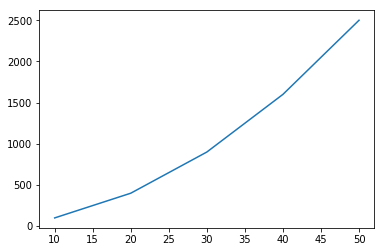

In [3]:
data = np.array([10,20,30,40,50])
yfunc = lambda x: x**2
plot_func(data, np.vectorize(yfunc)(data));

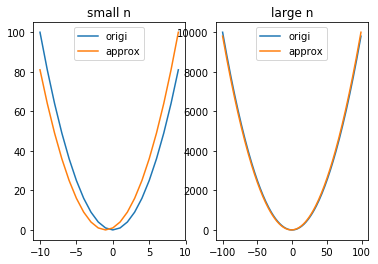

In [4]:
data = np.array([1,2,3,4,5])
sdata = np.arange(-10, 10)
ldata = np.arange(-100, 100)

yfunc2 = lambda x: x**2
tfunc2 = lambda x: x**2 + (2*x) + (2/2) + (0) #yfunc(x) + np.gradient(yfunc(x))

plt.subplot(1,2,1)
plot_taylorz(sdata, yfunc2, tfunc2)
plt.title('small n') 
plt.subplot(1,2,2)
plot_taylorz(ldata, yfunc2, tfunc2)
plt.title('large n')
plt.show(); 

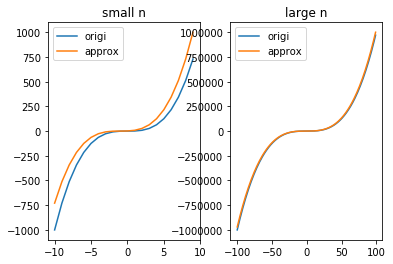

In [5]:
yfunc3 = lambda x: x**3
tfunc3 = lambda x: x**3 + (3*x**2) + (3*x) + (1) #yfunc(x) + np.gradient(yfunc(x))

plt.subplot(1,2,1)
plot_taylorz(sdata, yfunc3, tfunc3)
plt.title('small n')
plt.subplot(1,2,2)
plot_taylorz(ldata, yfunc3, tfunc3)
plt.title('large n')
plt.show(); 

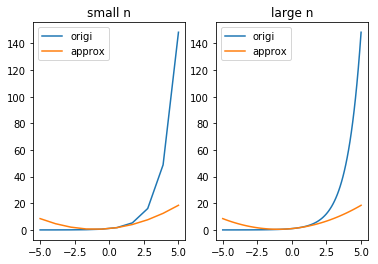

In [6]:
sdata = np.linspace(-5, 5, 10)
ldata = np.linspace(-5, 5, 100)

yfunce = lambda x: np.exp(x)
tfunce = lambda x: 1 + x + (0.5 * x**2)

plt.subplot(1,2,1)
plot_taylorz(sdata, yfunce, tfunce)
plt.title('small n')
plt.subplot(1,2,2)
plot_taylorz(ldata, yfunce, tfunce)
plt.title('large n')
plt.show(); 

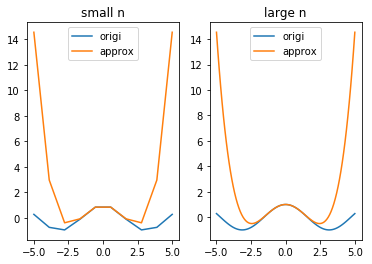

In [7]:
yfunce = lambda x: np.cos(x)
tfunce = lambda x: 1 - (1/2)*x**2 + (1/24)*(x**4)

plt.subplot(1,2,1)
plot_taylorz(sdata, yfunce, tfunce)
plt.title('small n')
plt.subplot(1,2,2)
plot_taylorz(ldata, yfunce, tfunce)
plt.title('large n')
plt.show(); 

When a series diverges -- adding more terms doesn't improve the approximation;no convergence. There's a radius of convergence


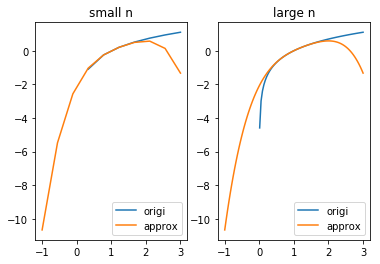

In [8]:
print("When a series diverges -- adding more terms doesn't improve the approximation;no convergence. There's a radius of convergence")
sdata = np.linspace(-1, 3, 10)
ldata = np.linspace(-1, 3, 100)

yfuncln = lambda x: np.log(x)
tfuncln = lambda x: (x-1) - ((x-1)**2)/2 + ((x-1)**3)/3 - ( (x-1)**4)/4

plt.subplot(1,2,1)
plot_taylorz(sdata, yfuncln, tfuncln)
plt.title('small n')
plt.subplot(1,2,2)
plot_taylorz(ldata, yfuncln, tfuncln)
plt.title('large n')
plt.show(); 

## Using sympy

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


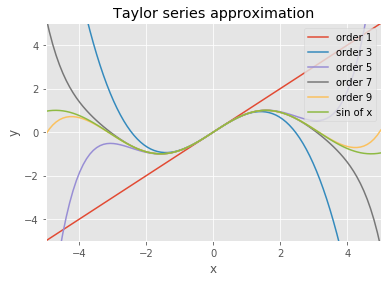

In [9]:
import sympy as sy 
from sympy.functions import sin, cos

plt.style.use('ggplot')

x = sy.Symbol('x')
fx = sin(x)

def factorial(n):
    if n<= 0:
        return 1
    else:
        return n* factorial(n-1)

def taylor(func, x0, n):
    i, p = 0, 0
    while i<=n:
        p = p + (func.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p


def plotit(n=100, k=10, s=2):
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0], x_lims[1], n)
    y1 = []
    
    for j in range(1,k,s):
        func = taylor(fx, 0, j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append( func.subs(x,k))
        plt.plot(x1, y1, label='order '+str(j) )
        y1 = []
        
        
    plt.plot(x1, np.sin(x1), label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()
    
plotit()

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x


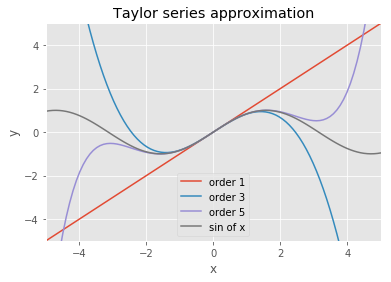

In [10]:
plotit(100, 6, 2)

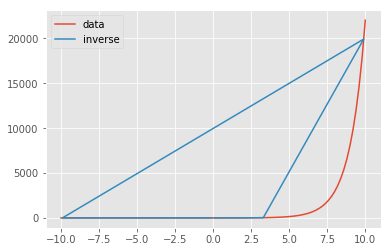

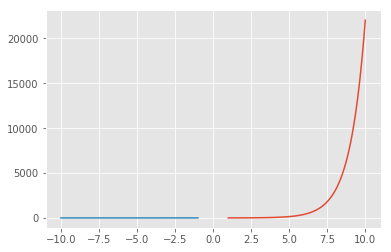

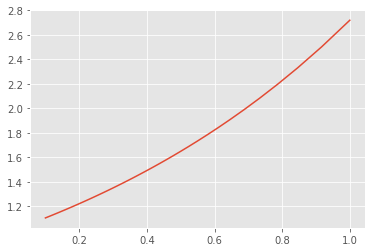

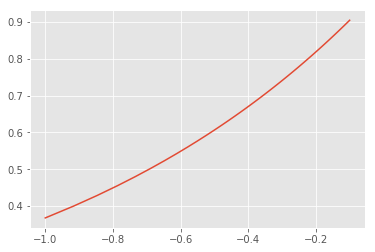

In [11]:
data = np.linspace(-10,10,100)


pdata = np.linspace(1,10,100)
ndata = np.linspace(-10,-1,100)


plt.plot(data, np.exp(data), label='data')
plt.plot(1/data, np.exp(1/data), label='inverse')
plt.legend()
plt.show();

plt.plot(pdata, np.exp(pdata))
plt.plot(ndata, np.exp(ndata));
plt.show();


plt.plot(1/pdata, np.exp(1/pdata))
plt.show()
plt.plot(1/ndata, np.exp(1/ndata));


# O complexities

n = 10
----------
	identity:		10
	log n:		23.02585092994046
	log n + 1:		23.978952727983707
	square:		100
	cubed:		1000
	quad:		10000
	exponential:		22026.465794806718
	factorial:		36288000


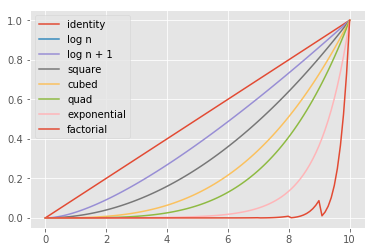

In [21]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n-1)

def compare_o(n=10):
    valz = []
    labelz = []
    funcz = [
       (lambda x: x, 'identity'),
        (lambda x: x* np.log(x),'log n'),
        (lambda x: x* np.log(x+1),'log n + 1'),
        (lambda x: x**2, 'square'),
        (lambda x: x**3, 'cubed'),
        (lambda x: x**4, 'quad'),
        (lambda x: np.exp(x), 'exponential'),
        (lambda x: x* factorial(x), 'factorial'), 
    ]
    
    dd  = np.linspace(0,10, 100) 
    print(f"n = {n}\n{'-'*10}" )
    for i, f in enumerate(funcz):
        print( f"\t{f[1]}:\t\t{ f[0](n)}" )
        y = np.vectorize(f[0])(dd)
        plt.plot( dd, y/np.max(y), label=f[1])
    plt.legend()
    plt.show();

          
compare_o()